In [89]:
import numpy as np 
import pandas as pd 

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
# There are three types of NB model.
from sklearn.datasets import fetch_covtype, fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
from sklearn import metrics

In [90]:
prior = [0.45,0.3,0.15,0.1]
likelihood = [[0.3,0.3,0.4],[0.7,0.2,0.1],[0.15,0.5,0.35],[0.6,0.2,0.2]]

idx = 0 # This is indexing number.
for c,xs in zip(prior,likelihood): # Both objects have 4 elements.
    # zip function concatenate two different datasets.
    result = 1.0
    for x in xs:
        result *= x
    result *= c
    idx+=1
    print(f"{idx}th probability : {result}")

1th probability : 0.0162
2th probability : 0.0042
3th probability : 0.0039375
4th probability : 0.0024000000000000002


In [91]:
covtype = fetch_covtype() # we are fetching dataset from online.
# This data is related to the forest in the United States. 
# Classification problem (Multi-variate)
# Classifying the soil.
# Consists of 580000 samples.
print(covtype.DESCR)

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30횞30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like 'Bunch' object
with the feature matrix in the ``data`` member
and the target values in ``target``. If optional a

In [92]:
pd.DataFrame(covtype.data)
covtype.target # This is the label of each sample data.

array([5, 5, 2, ..., 3, 3, 3])

In [93]:
# Splitting training and test data.
covtype_X = covtype.data
covtype_Y = covtype.target
covtype_Xtrain, covtype_Xtest, covtype_Ytrain, covtype_Ytest = train_test_split(covtype_X,covtype_Y,test_size=0.2)
print(f'size of data : {covtype_X.shape}')
print(f'size of training dataset = {covtype_Xtrain.shape}')
print(f'size of test dataset = {covtype_Xtest.shape}')

size of data : (581012, 54)
size of training dataset = (464809, 54)
size of test dataset = (116203, 54)


In [94]:
covtype_df = pd.DataFrame(data=covtype_X)
covtype_df.describe()
# describe function will provide statistical description of the data.

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [95]:
covtype_train_df = pd.DataFrame(data = covtype_Xtrain)
covtype_train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,...,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000
mean,2959.333470,155.793141,14.103967,269.488347,46.425360,2351.164465,212.162021,223.320841,142.510100,1979.781463,...,0.044225,0.090237,0.077782,0.002739,0.003264,0.000209,0.000523,0.026742,0.023941,0.015058
std,280.166764,111.921127,7.492310,212.807631,58.371351,1560.079326,26.774370,19.775964,38.277746,1323.600077,...,0.205594,0.286521,0.267829,0.052262,0.057036,0.014445,0.022859,0.161329,0.152866,0.121783
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1998.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3164.000000,261.000000,18.000000,384.000000,69.000000,3330.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7172.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
covtype_test_df = pd.DataFrame(data = covtype_Xtest)
covtype_test_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,...,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000,116203.000000
mean,2959.492621,155.111477,14.102648,269.187697,46.392838,2346.075222,212.082158,223.310216,142.600914,1982.330267,...,0.043975,0.091013,0.077451,0.002909,0.003219,0.000189,0.000473,0.027047,0.023046,0.015068
std,279.256601,111.882914,7.471979,211.513848,57.990000,1555.952743,26.751978,19.739685,38.261737,1326.576799,...,0.205040,0.287629,0.267306,0.053854,0.056641,0.013758,0.021751,0.162223,0.150050,0.121826
min,1860.000000,0.000000,0.000000,0.000000,-157.000000,0.000000,0.000000,45.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2811.000000,58.000000,9.000000,108.000000,7.000000,1104.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,126.000000,13.000000,218.000000,30.000000,1992.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3163.000000,260.000000,18.000000,390.000000,69.000000,3321.000000,231.000000,237.000000,168.000000,2547.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3851.000000,360.000000,62.000000,1390.000000,597.000000,7116.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [97]:
scaler = StandardScaler() # we are using standard scaler in this problem. 
# MinMax scaler and standard scaler are the common schemes for the scaling. 
covtype_Xtrain_scale = scaler.fit_transform(covtype_Xtrain)
covtype_Xtest_scale = scaler.transform(covtype_Xtest)

In [98]:
covtype_Xtrain_df = pd.DataFrame(covtype_Xtrain_scale)
covtype_Xtrain_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,...,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05
mean,7.199456e-16,-1.027882e-16,6.350123e-17,-4.528705e-17,-6.032159e-17,-2.269321e-17,3.292617e-16,3.980063e-16,-1.357465e-16,1.999509e-17,...,6.114707e-18,2.869326e-17,-1.442307e-17,-2.108045e-17,3.434937e-17,3.515957e-19,4.800045e-18,6.946307e-17,-3.149074e-17,4.998773e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-3.927428e+00,-1.391992e+00,-1.882461e+00,-1.266349e+00,-3.759132e+00,-1.507082e+00,-7.924080e+00,-1.129255e+01,-3.723058e+00,-1.495757e+00,...,-2.151068e-01,-3.149404e-01,-2.904185e-01,-5.240497e-02,-5.722231e-02,-1.444754e-02,-2.287070e-02,-1.657618e-01,-1.566150e-01,-1.236447e-01
25%,-5.365862e-01,-8.737693e-01,-6.812282e-01,-7.588474e-01,-6.754238e-01,-7.981426e-01,-5.289401e-01,-5.218887e-01,-6.141983e-01,-7.221082e-01,...,-2.151068e-01,-3.149404e-01,-2.904185e-01,-5.240497e-02,-5.722231e-02,-1.444754e-02,-2.287070e-02,-1.657618e-01,-1.566150e-01,-1.236447e-01
50%,1.308741e-01,-2.572631e-01,-1.473469e-01,-2.419481e-01,-2.813945e-01,-2.263762e-01,2.180438e-01,1.354756e-01,1.279858e-02,-2.038242e-01,...,-2.151068e-01,-3.149404e-01,-2.904185e-01,-5.240497e-02,-5.722231e-02,-1.444754e-02,-2.287070e-02,-1.657618e-01,-1.566150e-01,-1.236447e-01
75%,7.305176e-01,9.400099e-01,5.200047e-01,5.381000e-01,3.867422e-01,6.274274e-01,7.035833e-01,6.917070e-01,6.659203e-01,4.308092e-01,...,-2.151068e-01,-3.149404e-01,-2.904185e-01,-5.240497e-02,-5.722231e-02,-1.444754e-02,-2.287070e-02,-1.657618e-01,-1.566150e-01,-1.236447e-01
max,3.207616e+00,1.824562e+00,6.926580e+00,5.298273e+00,9.500812e+00,3.054871e+00,1.562615e+00,1.551337e+00,2.912659e+00,3.922804e+00,...,4.648854e+00,3.175204e+00,3.443307e+00,1.908216e+01,1.747570e+01,6.921593e+01,4.372407e+01,6.032755e+00,6.385086e+00,8.087693e+00


In [99]:
# 20 News group data
# This data should be classified into news categories.
newsgroup = fetch_20newsgroups()
print(newsgroup.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

In [100]:
# We need more pre processing for the text data.
print(len(newsgroup.target_names))

20


In [101]:
newsgroup_train = fetch_20newsgroups(subset = 'train')
newsgroup_test = fetch_20newsgroups(subset = 'test')

In [102]:
X_train, Y_train = newsgroup_train.data, newsgroup_train.target 
X_test, Y_test = newsgroup_test.data, newsgroup_test.target 

In [103]:
# Vectorization is needed 
# Count, Tfidf, Hashing schemes are the famous schemes. 
count_vectorizer = CountVectorizer()
count_vectorizer.fit(X_train)
X_train_count = count_vectorizer.transform(X_train)
X_test_count = count_vectorizer.transform(X_test)
# Note that fit_transform is only for training set.

In [104]:
X_train_count # This is expressed as sparse matrix.

<11314x130107 sparse matrix of type '<class 'numpy.int64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

In [105]:
#for v in X_train_count[0]:
    #print(v) # Number of the count.
    # X_train_count[0] represents the first article among all the samples. 
    # Therefore, v represents the frequency of the term in this document. 

Doc_Term_Matrix = pd.DataFrame(X_train_count.toarray(),columns = count_vectorizer.get_feature_names_out())
print(Doc_Term_Matrix) 

       00  000  0000  00000  000000  00000000  0000000004  0000000005  \
0       0    0     0      0       0         0           0           0   
1       0    0     0      0       0         0           0           0   
2       0    0     0      0       0         0           0           0   
3       0    0     0      0       0         0           0           0   
4       0    0     0      0       0         0           0           0   
...    ..  ...   ...    ...     ...       ...         ...         ...   
11309   0    0     0      0       0         0           0           0   
11310   0    0     0      0       0         0           0           0   
11311   0    0     0      0       0         0           0           0   
11312   0    0     0      0       0         0           0           0   
11313   0    0     0      0       0         0           0           0   

       00000000b  00000001  ...  çon  ère  ée  égligent  élangea  érale  ête  \
0              0         0  ...    0    0  

In [106]:
# Hashing vectorizer
hash_vectorizer = HashingVectorizer(n_features = 1000)
X_train_hash = hash_vectorizer.fit_transform(X_train)
X_test_hash = hash_vectorizer.transform(X_test)

In [107]:
# Tfidf vectorizer 
# Term frequency and inverse document frequency. 
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [108]:
for v in X_train_tfidf[0]:
    print(v)
# Those values are the product of tf and idf.

  (0, 86580)	0.13157118714240987
  (0, 128420)	0.04278499079283093
  (0, 35983)	0.03770448563619875
  (0, 35187)	0.09353930598317124
  (0, 66098)	0.09785515708314481
  (0, 114428)	0.05511105154696676
  (0, 78955)	0.05989856888061599
  (0, 94362)	0.055457031390147224
  (0, 76722)	0.06908779999621749
  (0, 57308)	0.1558717009157704
  (0, 62221)	0.02921527992427867
  (0, 128402)	0.05922294083277842
  (0, 67156)	0.07313443922740179
  (0, 123989)	0.08207027465330353
  (0, 90252)	0.031889368795417566
  (0, 63363)	0.08342748387969037
  (0, 78784)	0.0633940918806495
  (0, 96144)	0.10826904490745741
  (0, 128026)	0.060622095889758885
  (0, 109271)	0.10844724822064673
  (0, 51730)	0.09714744057976722
  (0, 86001)	0.07000411445838192
  (0, 83256)	0.08844382496462173
  (0, 113986)	0.17691750674853082
  (0, 37565)	0.03431760442478462
  :	:
  (0, 4605)	0.06332603952480323
  (0, 76032)	0.019219463052223086
  (0, 92081)	0.09913274493911223
  (0, 40998)	0.0780136819691811
  (0, 79666)	0.109364012524142

In [109]:
model = GaussianNB()
model.fit(covtype_Xtrain_scale, covtype_Ytrain)

GaussianNB()

In [110]:
predict = model.predict(covtype_Xtrain_scale)
# This prediction is the initial model's prediction on the train dataset.
# This should not be high.
acc = metrics.accuracy_score(covtype_Ytrain,predict)
f1 = metrics.f1_score(covtype_Ytrain,predict,average=None)
# What is f1 score?
print('Train Accuracy = {}'.format(acc))
print('Train f1 score = {}'.format(f1))

Train Accuracy = 0.08853098799722037
Train f1 score = [0.04061865 0.0181485  0.33522381 0.13996109 0.04376446 0.07073359
 0.23780839]


In [111]:
predict = model.predict(covtype_Xtest_scale)
acc = metrics.accuracy_score(covtype_Ytest,predict)
f1 = metrics.f1_score(covtype_Ytest,predict,average=None)
print('Test Accuracy = {}'.format(acc))
print('Test f1 score = {}'.format(f1))

Test Accuracy = 0.08635749507327693
Test f1 score = [0.03970555 0.01715716 0.33403424 0.1317869  0.04203255 0.06206615
 0.23488256]


In [112]:
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs 
# Which library is this? 
def make_meshgrid(x,y, h = 0.02):
    x_min, x_max = x.min()-1,x.max()-1
    y_min, y_max = y.min()-1,y.max()-1
    xx, yy = np.meshgrid(np.arange(x_min,x_max,h),
    np.arange(y_min,y_max,h))
    return xx,yy

def plot_contours(clf,xx,yy, **params):
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx,yy,Z,**params)
    return out

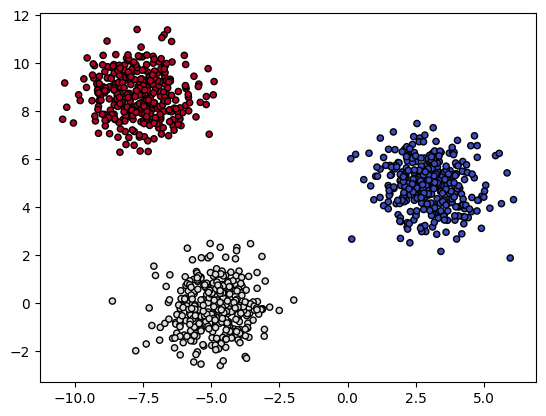

In [113]:
X, y = make_blobs(n_samples=1000)
plt.scatter(X[:,0],X[:,1],c = y, cmap = plt.cm.coolwarm, s=20,edgecolors='k')

In [114]:
model = GaussianNB()
model.fit(X,y)

GaussianNB()

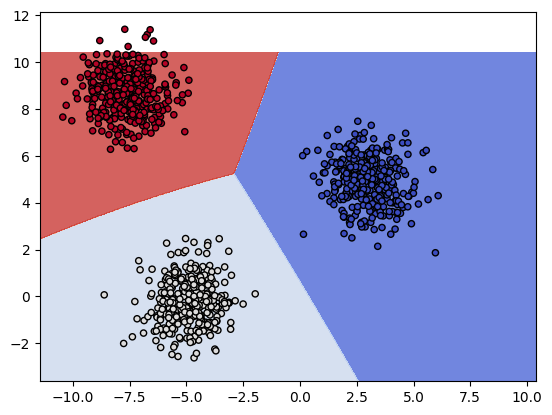

In [115]:
xx,yy = make_meshgrid(X[:,],X[:,1])
plot_contours(model,xx,yy,cmap = plt.cm.coolwarm, alpha = 0.8)
plt.scatter(X[:,0],X[:,1],c = y, cmap = plt.cm.coolwarm, s=20,edgecolors='k')